# Data Analysis of Covid19 Tweets 

Using Pandas, neattext, matplotlib, textblob & seaborn

In [35]:
# Main Exploratory Data Analysis (EDA) Package
import pandas as pd

## Text Cleaning Package
import neattext.functions as nfx

## Sentiment Analysis Package
from textblob import TextBlob as tblob

In [36]:
# Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore') #ignore all warnings

In [38]:
# Load Dataset
df = pd.read_csv("data/covid19_tweets.csv")

# Text Analysis of Tweet:

## 1. Text Cleaning using neattext package
+ remove mentions/userhandles
+ remove hashtags
+ urls
+ emojis
+ special char

In [39]:
# Cleaning Text: Hashtags
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [40]:
# Cleaning Text: Mentions/Userhandlers
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [41]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [42]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [43]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [44]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that…
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,Hey and wouldnt it have made more sense to have the players pay their respects to the A…
2,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,Trump never once claimed was a hoax We all claim that this effort to…
3,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,The one gift has give me is an appreciation for the simple things that were always around me…
4,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,25 July : Media Bulletin on Novel
...,...,...
179103,"Thanks @IamOhmai for nominating me for the @WHO #WearAMask challenge.\n\nI nominate @abdlbaasit_ @hvbxxb,… https://t.co/IegQDkKudT",Thanks for nominating me for the challenge I nominate
179104,2020! The year of insanity! Lol! #COVID19 https://t.co/y48NP0yzgn,2020 The year of insanity Lol
179105,@CTVNews A powerful painting by Juan Lucena. It's a tribute to the grandparents who died of COVID 19 and the grandc… https://t.co/wnXbbyoCe2,A powerful painting by Juan Lucena Its a tribute to the grandparents who died of COVID 19 and the grandc…
179106,"More than 1,200 students test positive for #COVID19 at major university - ABC News https://t.co/6aNhSiF5gh",More than 1200 students test positive for at major university ABC News


In [45]:
## Previwe of a single row after Text Cleaning
df[['text','clean_tweet']].iloc[3]

text           @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW
clean_tweet                                                 The one gift has give me is an appreciation for the simple things that were always around me… 
Name: 3, dtype: object

## 2. Sentiment Analysis

In [46]:
def get_sentiment(text):
    blob = tblob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [47]:
## Showing Sentiment of a Single row
example1 = df['clean_tweet'].iloc[12]

In [48]:
get_sentiment(example1)

{'polarity': 0.5, 'subjectivity': 0.5, 'sentiment': 'Positive'}

In [49]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [50]:
df['sentiment_results']

0                                     {'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}
1                                        {'polarity': 0.5, 'subjectivity': 0.5, 'sentiment': 'Positive'}
2                                         {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
3                         {'polarity': 0.0, 'subjectivity': 0.35714285714285715, 'sentiment': 'Neutral'}
4                                         {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
                                                       ...                                              
179103                                   {'polarity': 0.2, 'subjectivity': 0.2, 'sentiment': 'Positive'}
179104                                   {'polarity': 0.8, 'subjectivity': 0.7, 'sentiment': 'Positive'}
179105                                   {'polarity': 0.3, 'subjectivity': 1.0, 'sentiment': 'Positive'}
179106    {'polarity': 0.26325757575757575, 'subjectivi

In [51]:
## Previwe of a single row after Text Sentiment Process
df['sentiment_results'].iloc[5]

{'polarity': -0.6999999999999998,
 'subjectivity': 0.6666666666666666,
 'sentiment': 'Negative'}

In [52]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,-0.25,0.25,Negative


In [53]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [56]:
df[['clean_tweet','sentiment']]

,clean_tweet,sentiment
0,If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that…,Negative
1,Hey and wouldnt it have made more sense to have the players pay their respects to the A…,Positive
2,Trump never once claimed was a hoax We all claim that this effort to…,Neutral
3,The one gift has give me is an appreciation for the simple things that were always around me…,Neutral
4,25 July : Media Bulletin on Novel,Neutral
...,...,...
179103,Thanks for nominating me for the challenge I nominate,Positive
179104,2020 The year of insanity Lol,Positive
179105,A powerful painting by Juan Lucena Its a tribute to the grandparents who died of COVID 19 and the grandc…,Positive
179106,More than 1200 students test positive for at major university ABC News,Positive


In [22]:
df['sentiment'].value_counts()

Neutral     75490
Positive    74154
Negative    29464
Name: sentiment, dtype: int64

<AxesSubplot:>

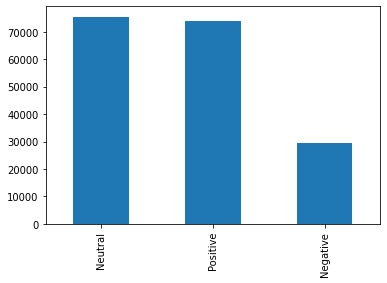

In [23]:
df['sentiment'].value_counts().plot(kind='bar')

In [34]:
# Plot with seaborn
sns.countplot(df['sentiment'])

KeyError: 'sentiment'

In [57]:
df['real_label'].iloc[0] = 'negative'

KeyError: 'real_label'